## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read dataset

In [2]:
df=pd.read_csv("./HR_Employee_Data.csv")


In [3]:
total_values=df.size
print(total_values)

149990


## Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14995 non-null  object 
 1   satisfaction_level     14968 non-null  object 
 2   last_evaluation        14949 non-null  object 
 3   number_project         14927 non-null  float64
 4   average_montly_hours   14898 non-null  float64
 5   time_spend_company     14912 non-null  float64
 6   left                   14783 non-null  float64
 7   promotion_last_5years  3079 non-null   float64
 8   Department             14919 non-null  object 
 9   salary                 14902 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

## Data cleanig

### Convert data string into integer

In [6]:
df['last_evaluation'] = df['last_evaluation'].str.replace(r'\W',"")
print(df.head())

     Emp_Id satisfaction_level last_evaluation  number_project  \
0  IND02438                38%              53             2.0   
1  IND28133                80%              86             5.0   
2  IND07164                11%              88             7.0   
3  IND30478                72%              87             5.0   
4  IND24003                NaN              52             2.0   

   average_montly_hours  time_spend_company  left  promotion_last_5years  \
0                 157.0                 3.0   1.0                    NaN   
1                 262.0                 6.0   1.0                    NaN   
2                 272.0                 4.0   1.0                    NaN   
3                 223.0                 5.0   1.0                    NaN   
4                 159.0                 3.0   1.0                    NaN   

  Department  salary  
0      sales     low  
1      sales  medium  
2      sales  medium  
3      sales     low  
4      sales     low  


C:\Users\Vinay\AppData\Local\Temp/ipykernel_24724/3809622228.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['last_evaluation'] = df['last_evaluation'].str.replace(r'\W',"")


In [7]:
df['satisfaction_level']= df['satisfaction_level'].str.replace(r'\W',"")
print(df.head())

C:\Users\Vinay\AppData\Local\Temp/ipykernel_24724/3669955093.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['satisfaction_level']= df['satisfaction_level'].str.replace(r'\W',"")


     Emp_Id satisfaction_level last_evaluation  number_project  \
0  IND02438                 38              53             2.0   
1  IND28133                 80              86             5.0   
2  IND07164                 11              88             7.0   
3  IND30478                 72              87             5.0   
4  IND24003                NaN              52             2.0   

   average_montly_hours  time_spend_company  left  promotion_last_5years  \
0                 157.0                 3.0   1.0                    NaN   
1                 262.0                 6.0   1.0                    NaN   
2                 272.0                 4.0   1.0                    NaN   
3                 223.0                 5.0   1.0                    NaN   
4                 159.0                 3.0   1.0                    NaN   

  Department  salary  
0      sales     low  
1      sales  medium  
2      sales  medium  
3      sales     low  
4      sales     low  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14995 non-null  object 
 1   satisfaction_level     14968 non-null  object 
 2   last_evaluation        14949 non-null  object 
 3   number_project         14927 non-null  float64
 4   average_montly_hours   14898 non-null  float64
 5   time_spend_company     14912 non-null  float64
 6   left                   14783 non-null  float64
 7   promotion_last_5years  3079 non-null   float64
 8   Department             14919 non-null  object 
 9   salary                 14902 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.1+ MB


In [9]:
df.head(5)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,IND02438,38,53,2.0,157.0,3.0,1.0,NaN,sales,low
1,IND28133,80,86,5.0,262.0,6.0,1.0,NaN,sales,medium
2,IND07164,11,88,7.0,272.0,4.0,1.0,NaN,sales,medium
3,IND30478,72,87,5.0,223.0,5.0,1.0,NaN,sales,low
4,IND24003,NaN,52,2.0,159.0,3.0,1.0,NaN,sales,low


In [9]:
df.isna().sum()

Emp_Id                       4
satisfaction_level          31
last_evaluation             50
number_project              72
average_montly_hours       101
time_spend_company          87
left                       216
promotion_last_5years    11920
Department                  80
salary                      97
dtype: int64

In [10]:
df['average_montly_hours'].fillna(df['average_montly_hours'].mean(), inplace = True)


In [11]:
df.isna().sum()

Emp_Id                       4
satisfaction_level          31
last_evaluation             50
number_project              72
average_montly_hours         0
time_spend_company          87
left                       216
promotion_last_5years    11920
Department                  80
salary                      97
dtype: int64

In [12]:
df.dropna(subset = ["Emp_Id","satisfaction_level","last_evaluation","number_project",
                    "time_spend_company","left","Department","salary"], inplace=True)

In [13]:
df.isna().sum()

Emp_Id                       0
satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
left                         0
promotion_last_5years    11389
Department                   0
salary                       0
dtype: int64

In [14]:
df.isna().sum()

Emp_Id                       0
satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
left                         0
promotion_last_5years    11389
Department                   0
salary                       0
dtype: int64

### Convert textualvalues into numeric value

In [15]:
department_unique_values=df["Department"].unique()
print(department_unique_values)

['sales' 'accounting' 'technical' 'management' 'IT' 'product_mng'
 'marketing' 'support' 'hr' 'RandD']


In [16]:
df["Department"].replace({"sales": "1",
                          "accounting": "2",
                          "hr": "3",
                          "technical": "4",
                          "support": "5",
                          "management": "6",
                          "IT": "7",
                          "product_mng": "8",
                          "marketing": "9",
                          "RandD":"10"
                          }, inplace=True)

In [17]:
Salary_unique_Values=df["salary"].unique()
print(Salary_unique_Values)

['low' 'medium' 'high']


In [18]:
df["salary"].replace({"low":"1",
                      "medium":"2",
                      "high":"3"
                     },inplace=True)

In [19]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,IND02438,38,53,2.0,157.0,3.0,1.0,NaN,1,1
1,IND28133,80,86,5.0,262.0,6.0,1.0,NaN,1,2
2,IND07164,11,88,7.0,272.0,4.0,1.0,NaN,1,2
3,IND30478,72,87,5.0,223.0,5.0,1.0,NaN,1,1
7,IND16300,92,85,5.0,259.0,5.0,1.0,NaN,1,1


### Find null data into columns

In [20]:
df.isna().sum()

Emp_Id                       0
satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
left                         0
promotion_last_5years    11389
Department                   0
salary                       0
dtype: int64

In [21]:
df.drop(['promotion_last_5years','Emp_Id'],axis='columns',inplace=True)

In [22]:
df.isna().sum()

satisfaction_level      0
last_evaluation         0
number_project          0
average_montly_hours    0
time_spend_company      0
left                    0
Department              0
salary                  0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14462 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14462 non-null  object 
 1   last_evaluation       14462 non-null  object 
 2   number_project        14462 non-null  float64
 3   average_montly_hours  14462 non-null  float64
 4   time_spend_company    14462 non-null  float64
 5   left                  14462 non-null  float64
 6   Department            14462 non-null  object 
 7   salary                14462 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1016.9+ KB


### Convert data type object into float

In [24]:
df['satisfaction_level']=df.satisfaction_level.astype(float)
df['last_evaluation']=df.last_evaluation.astype(float)
df['Department']=df.Department.astype(float)

df['salary']=df.salary.astype(float)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14462 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14462 non-null  float64
 1   last_evaluation       14462 non-null  float64
 2   number_project        14462 non-null  float64
 3   average_montly_hours  14462 non-null  float64
 4   time_spend_company    14462 non-null  float64
 5   left                  14462 non-null  float64
 6   Department            14462 non-null  float64
 7   salary                14462 non-null  float64
dtypes: float64(8)
memory usage: 1016.9 KB


### Check coefficient of correlation 

In [25]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Department,salary
satisfaction_level,1.000000,0.104674,-0.134772,-0.011954,-0.108210,-0.374634,0.017940,0.043859
last_evaluation,0.104674,1.000000,0.320688,0.310923,0.115185,0.003615,0.010831,-0.013977
number_project,-0.134772,0.320688,1.000000,0.380892,0.184066,0.019634,0.003258,-0.001169
average_montly_hours,-0.011954,0.310923,0.380892,1.000000,0.109062,0.069367,-0.003676,-0.004237
time_spend_company,-0.108210,0.115185,0.184066,0.109062,1.000000,0.137812,-0.002613,0.050586
left,-0.374634,0.003615,0.019634,0.069367,0.137812,1.000000,-0.049247,-0.151900
Department,0.017940,0.010831,0.003258,-0.003676,-0.002613,-0.049247,1.000000,0.037614
salary,0.043859,-0.013977,-0.001169,-0.004237,0.050586,-0.151900,0.037614,1.000000


In [26]:

df['satisfaction_level'].value_counts()

10.0    297
11.0    293
74.0    250
77.0    245
84.0    238
       ... 
25.0     34
28.0     31
27.0     30
26.0     29
12.0     29
Name: satisfaction_level, Length: 92, dtype: int64

<AxesSubplot:>

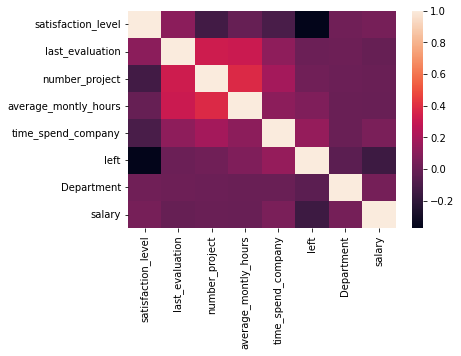

In [27]:
sns.heatmap(df.corr())

In [28]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Department,salary
count,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000
mean,61.939911,71.579035,3.798852,200.822673,3.484649,0.209791,4.337298,1.600885
std,24.561754,17.016068,1.204774,49.312734,1.473367,0.407174,2.822169,0.639626
min,9.000000,36.000000,2.000000,96.000000,2.000000,0.000000,1.000000,1.000000
25%,45.000000,56.000000,3.000000,157.000000,3.000000,0.000000,1.000000,1.000000
50%,65.000000,72.000000,4.000000,200.000000,3.000000,0.000000,4.000000,2.000000
75%,82.000000,87.000000,5.000000,244.000000,4.000000,0.000000,7.000000,2.000000
max,100.000000,100.000000,7.000000,310.000000,10.000000,1.000000,10.000000,3.000000


In [29]:
values=df.size
print("Total Values After Data Cleaning :" ,values)

Total Values After Data Cleaning : 115696


In [30]:
Data=((values/total_values)*100)
print("useful data after data cleaning in percentage is :", Data)

useful data after data cleaning in percentage is : 77.13580905393694


# Export CSV File

In [31]:
df.to_csv("C:\\Users\\Vinay\\OneDrive\\Desktop\\B2_56306_Vinay\\Project\\project\\New_HR_Employee_Data.csv",index=False)

In [32]:
df['left'].value_counts()


0.0    11428
1.0     3034
Name: left, dtype: int64

## decide the dependent and independent variables

In [33]:
x = df.drop(['left'], axis=1)
y = df.left

## split the data into train and test sets

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1234567)

## create and train the model

In [40]:
from sklearn.svm import SVC
    
    # create the model
model = SVC()
    
    # train the model
model.fit(x_train, y_train)
    
predictions = model.predict(x_test)    

## model evluation

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score , classification_report


In [41]:
cm = confusion_matrix(y_test, predictions)
cm

array([[2176,   87],
       [ 336,  294]], dtype=int64)

In [42]:
accuracy = accuracy_score(y_test, predictions)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 85.38%


In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2263
         1.0       0.77      0.47      0.58       630

    accuracy                           0.85      2893
   macro avg       0.82      0.71      0.75      2893
weighted avg       0.85      0.85      0.84      2893



In [46]:
pre=model.predict([[90,90,3,200,4,3,2]])
print(pre)

[0.]


c:\users\vinay\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
pre=model.predict([[11,30,6,35,4,3,2]])
print(pre)

[1.]


c:\users\vinay\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
